In [32]:
#Import des librairies pour le fonctionnement du programme

In [33]:
import os

import numpy as np
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt

PATH = "2nd_test"
Fs=20480
Ts=488.28

In [34]:
def load_data():
    data = []
    for filename in sorted(os.listdir(PATH)):
        f = os.path.join(PATH, filename)
        with open(f, "r") as file:
            lines = file.readlines()
            for line in lines:
                data.append(line.replace("\n", "").split("\t"))
    return np.asarray(data).astype('float64')

def load_file(file):
    data = []
    f = os.path.join(PATH, file)
    with open(f, "r") as file:
        lines = file.readlines()
        for line in lines:
            data.append(line.replace("\n", "").split("\t"))
    return np.asarray(data).astype('float64')

In [35]:

def find_n_file(n):
    for index,filename in enumerate(sorted(os.listdir(PATH))):
        if index == n-1:
            return filename
    
first = find_n_file(100)
second = find_n_file(750)

print("first :",first)
print("second :",second)


first_data = load_file(first)
second_data = load_file(second)



first : 2004.02.13.03.02.39
second : 2004.02.17.15.22.39


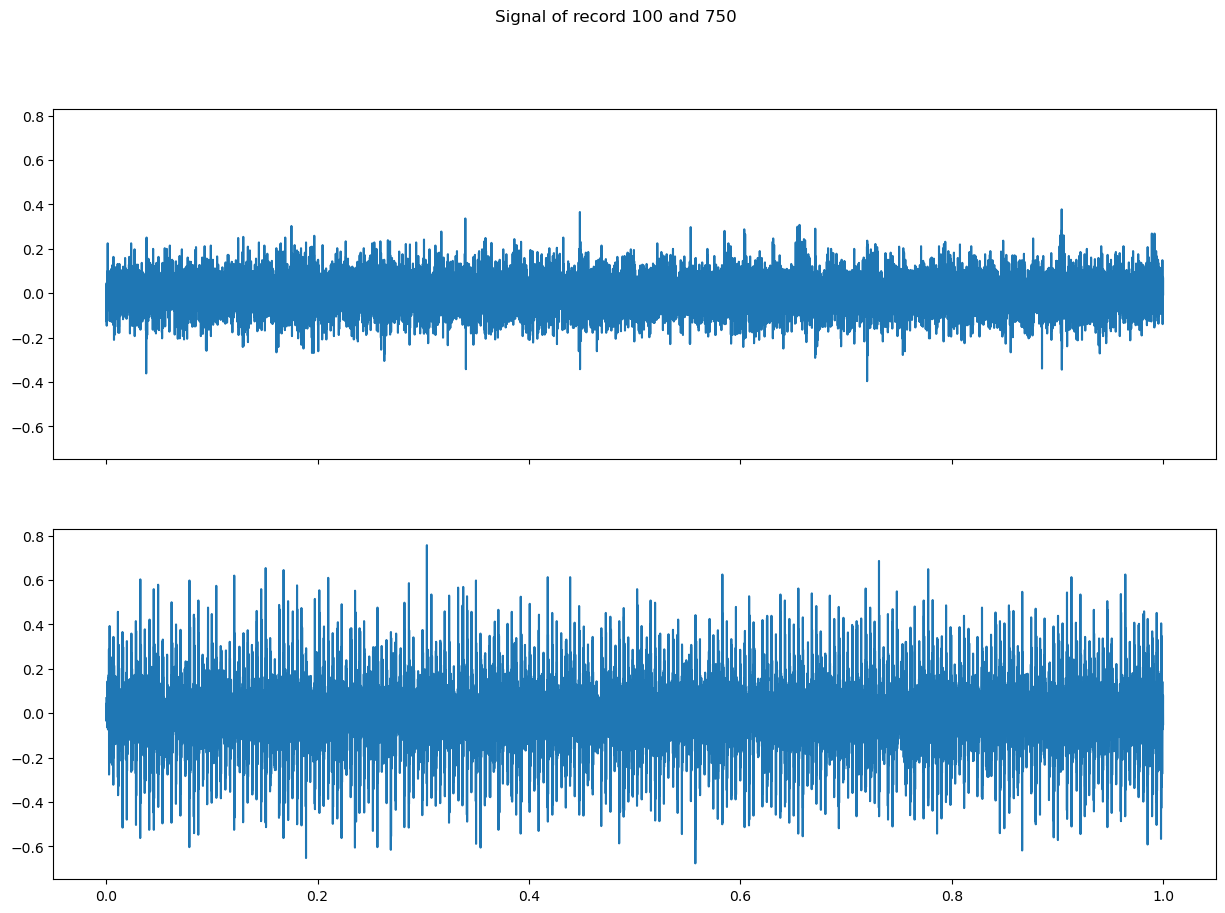

In [36]:


fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(15, 10))
fig.suptitle('Signal of record 100 and 750')
axs[0].plot(np.linspace(0, 1, len(first_data)), first_data[:, 0])
axs[1].plot(np.linspace(0, 1, len(second_data)), second_data[:, 0])



In [37]:
## On peut constater que la vibration augmente dans le temp, l'amplitude observé sur le signal 1 est plus grande 
## que l'amplitude sur le signel 2

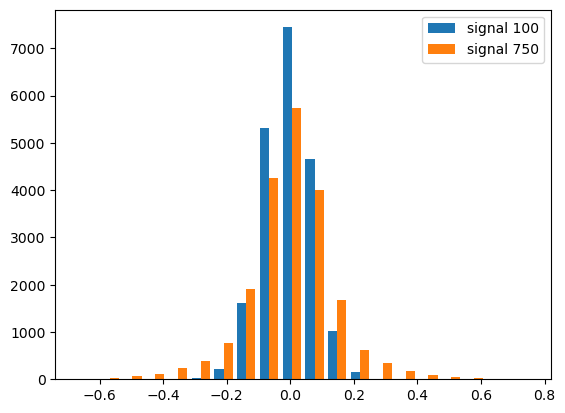

In [38]:
plt.hist([first_data[:, 0], second_data[:, 0]], bins=20, label=["signal 100", "signal 750"])
plt.legend(prop={'size': 10})
plt.show()

In [39]:
##On peut constater que les relevé sur le signal plus tardif sont beaucoup plus dispersé, cela est du aux vibrations

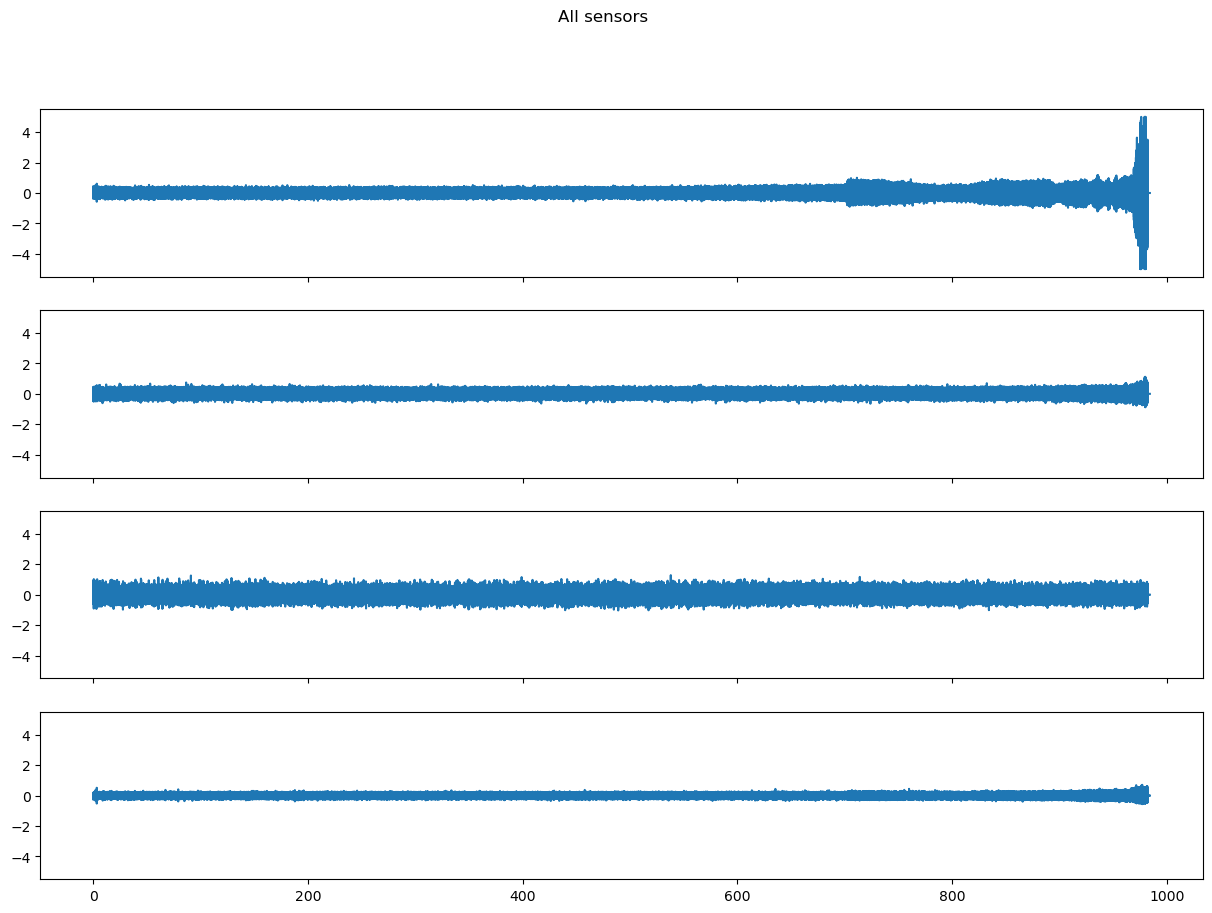

In [40]:
data = load_data()


fig, axs = plt.subplots(4, sharex=True, sharey=True, figsize=(15, 10))
fig.suptitle('All sensors')
for i in range(4):
    axs[i].plot(np.linspace(0, 984, len(data)), data[:, i])


In [41]:
## En comparant les 4 signaux relevé par les capteurs, on peut observer une vibration 

In [ ]:
## anormale exponentielle sur le 1er capteur

## Implémentation de peak-to-peak